In [173]:
import cv2 # for generating images to compare to the jpg dumps. main use case to verify visually I understand hdf5
from matplotlib import pyplot as plt  #display images notebook
import numpy as np
import h5py
import pandas as pd
from scipy.integrate import odeint
from glob import glob
import pickle
from sklearn.linear_model import LinearRegression
from scipy.signal import find_peaks
import seaborn as sns
f = h5py.File(r'C:\Users\jonat\Documents\runs\Run_11_45_29_1\trajectory.h5', 'r')
#print(list(f.keys()))

In [43]:
timepoints = [k for k in f['concentration']['co2'].keys()]
timepoints.sort(key=int)
dims = f['concentration']['co2']['0'].shape
numsteps = len(timepoints)
print(numsteps)

308


In [33]:
# generate the appropriate key for a radius at a given timestep
def radius_key(timestep):
    return(f"radius{timestep}")
# example
ts='1000'
radius_key(ts)

#generate all radius keys
for k in f['id'].keys():
    print(radius_key(k))
#let's look at a specific timestep


# radius
r1100 =f[radius_key(ts)]

# xyz
x=f['x'][ts]
y=f['y'][ts]
z=f['z'][ts]

#id
id=f['id'][ts]
types=f['type'][ts]

radius0
radius100
radius1000
radius10000
radius10100
radius10200
radius10300
radius10400
radius10500
radius10600
radius10700
radius10800
radius10900
radius1100
radius11000
radius11100
radius11200
radius11300
radius11400
radius11500
radius11600
radius11700
radius11800
radius11900
radius1200
radius12000
radius12100
radius12200
radius12300
radius12400
radius12500
radius12600
radius12700
radius12800
radius12900
radius1300
radius13000
radius13100
radius13200
radius13300
radius13400
radius13500
radius13600
radius13700
radius13800
radius13900
radius1400
radius14000
radius14100
radius14200
radius14300
radius14400
radius14500
radius14600
radius14700
radius14800
radius14900
radius1500
radius15000
radius15100
radius15200
radius15300
radius15400
radius15500
radius15600
radius15700
radius15800
radius15900
radius1600
radius16000
radius16100
radius16200
radius16300
radius16400
radius16500
radius16600
radius16700
radius16800
radius16900
radius1700
radius17000
radius17100
radius17200
radius17300
radius

In [38]:
# create a numpy array based on the extracted coordinates, radii, and ids for cells at the given timestep
# should be 4 columns by 3 rows here

cells = np.column_stack((x,y,z,r1100,id,types))

# scale x,y,z and raidius coordinates
px_pm = 2e7  #px per meter
cells[:,0:4] *= px_pm  
#note this updates cells in place, so re-running this block without re-creating the cells array is a Bad Thing
cells

array([[1.00995051e+02, 2.41743615e+02, 2.32317167e+01, 7.94651767e+00,
        1.70000000e+01, 2.00000000e+00],
       [3.70000000e+02, 1.29200000e+02, 5.58000000e+01, 9.63120159e+00,
        3.00000000e+01, 2.00000000e+00],
       [2.42000000e+02, 2.24000000e+02, 5.06000000e+01, 8.95781468e+00,
        3.60000000e+01, 2.00000000e+00],
       [9.55705484e+01, 2.38359689e+02, 5.69392608e+01, 7.47586319e+00,
        5.70000000e+01, 2.00000000e+00],
       [5.02000000e+02, 4.74000000e+02, 7.60000000e+01, 9.09684011e+00,
        5.50000000e+01, 2.00000000e+00],
       [2.86000000e+02, 1.76200000e+02, 1.29200000e+02, 1.91679270e+01,
        4.00000000e+00, 1.00000000e+00],
       [1.61600000e+02, 1.22400000e+02, 1.60200000e+02, 9.63143633e+00,
        2.20000000e+01, 2.00000000e+00],
       [2.38000000e+01, 4.34000000e+02, 1.71000000e+02, 9.63011363e+00,
        3.80000000e+01, 2.00000000e+00],
       [2.38000000e+02, 9.24000000e+02, 2.38000000e+01, 9.04975457e+00,
        4.70000000e+01, 

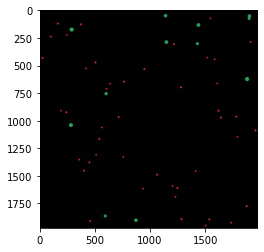

In [39]:
# determine image size, pad by largest radius + 20 %
im_padding  = max(cells[:,3])*1.2
im_width = int(max(cells[:,0]) + im_padding)
im_height= int(max(cells[:,1]) + im_padding)
# generate a blank image with the calculated dimensions and draw cells on it
# for comparing between timesteps probably just want to use the max x/y coords from all steps
blank_image = np.ones((im_height,im_width,3), np.uint8)


plt.imshow(blank_image)

            
def showcell(loc,rad,color):
    cv2.circle(blank_image, loc,rad,color,-1)
green = (44,162,95)
red = (222,45,38)

for cell in cells:
    xy_coord = (int(cell[0]),int(cell[1]))
    radius = int(cell[3])
    if cell[5]==1:
        color = green
    elif cell[5] ==2:
        color = red
    showcell(xy_coord,radius,color)


plt.imshow(blank_image)

In [99]:
ids = f['id']['0']
for i in ids:
    print(i)

17
30
36
55
4
22
38
47
46
10
50
49
41
34
35
54
44
29
31
3
14
23
56
21
11
8
33
45
24
27
19
26
9
53
2
6
7
5
40
1
42
25
20
43
39
28
12
51
18
13
52
32
37
48
16
15


In [104]:
for i in ids:
    print(i,f[radius_key(t)][i-1])

17 4.735e-07
30 4.805e-07
36 7.85e-07
55 4.98e-07
4 4.865e-07
22 5.1e-07
38 8.2e-07
47 4.47e-07
46 4.47e-07
10 7.25e-07
50 4.7e-07
49 5.05e-07
41 4.93e-07
34 4.465e-07
35 6.9e-07
54 5.1e-07
44 4.58e-07
29 4.44e-07
31 5.15e-07
3 4.79e-07
14 4.925e-07
23 4.66e-07
56 4.81e-07
21 5e-07
11 5e-07
8 4.84e-07
33 8.5e-07
45 4.84e-07
24 4.745e-07
27 4.965e-07
19 5.2e-07
26 6.85e-07
9 4.79e-07
53 4.85e-07
2 5.15e-07
6 5.15e-07
7 5.15e-07
5 9.1e-07
40 9.2e-07
1 5.2e-07
42 5.15e-07
25 7.9e-07
20 8.9e-07
43 5.05e-07
39 4.905e-07
28 4.44e-07
12 4.845e-07
51 4.77e-07
18 4.68e-07
13 4.74e-07
52 5.2e-07
32 4.775e-07
37 9.55e-07
48 5e-07
16 4.545e-07
15 4.505e-07


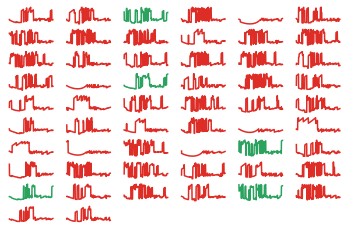

In [153]:
hrs = [int(x)/360 for x in timepoints]
fig ,axes = plt.subplots(nrows=10,ncols=6,sharex=True,sharey=True)
axs = axes.ravel()
df = pd.DataFrame(columns=['id','type','time','diameter'])
for i,c in enumerate(f['id']['0']):
    rad = []
    for t,h in zip(timepoints,hrs):
        radius = f[radius_key(t)][c-1]
        rad.append(2*f[radius_key(t)][c-1])
        celltype=f['type'][t][c-1]
        if celltype==1:
            color = '#2ca25f'
        elif celltype ==2:
            color = '#de2d26'
        df = df.append(pd.DataFrame([[c-1,celltype,h,radius*2]],columns=['id','type','time','diameter']),ignore_index=True)
    axs[i].plot(rad,c=color)
    #axs[i].set_title(f['type']['0'][c])
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_axis_off()
    #ax.spines['bottom'].set_visible(False)
plt.show()
fig.savefig('growthcurves.png',dpi=600)

In [140]:
df

,id,type,time,radius
0,16,2,0.000000,4.735000e-07
1,16,2,0.277778,4.513385e-07
2,16,2,0.555556,4.482198e-07
3,16,2,0.833333,4.451459e-07
4,16,2,1.111111,4.421183e-07
...,...,...,...,...
17243,14,2,84.166667,3.894900e-07
17244,14,2,84.444444,3.915064e-07
17245,14,2,84.722222,3.935368e-07
17246,14,2,85.000000,3.955815e-07


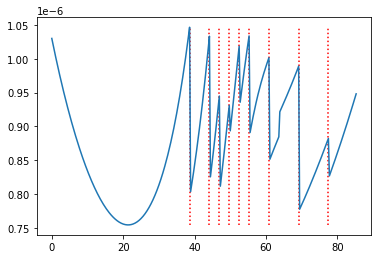

In [154]:
#plot cell size vs time
data = df[df.id==1].reset_index()
plt.plot(data.time,data.diameter)
for line in find_peaks(data.diameter):
    plt.vlines(data.time[line],data.diameter.min(),data.diameter.max(),color='r',ls=':')

In [167]:
pks,_ = find_peaks(data.diameter)

In [169]:
pks[0]

139

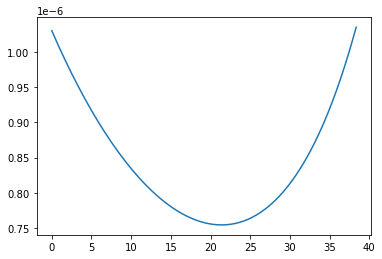

4.280062037331498e-10


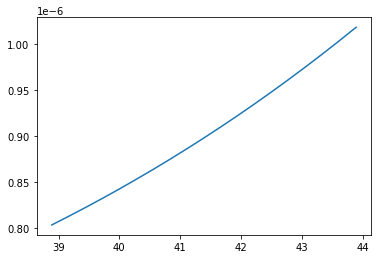

4.351842630048328e-08


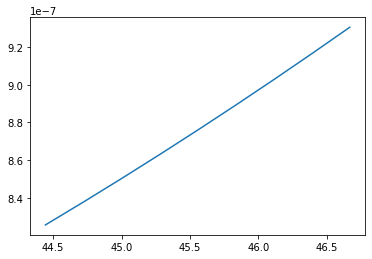

4.7743556210799916e-08


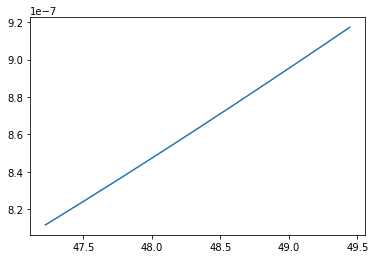

4.7767831529286024e-08


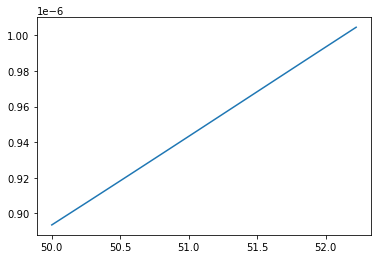

4.998833914485214e-08


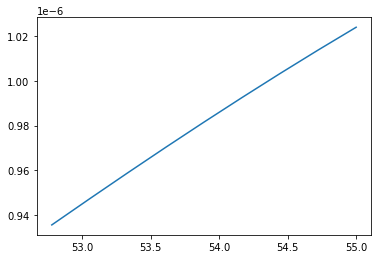

3.918321475906666e-08


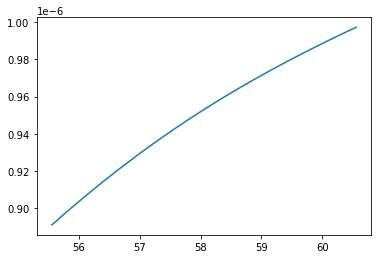

2.093453816636646e-08


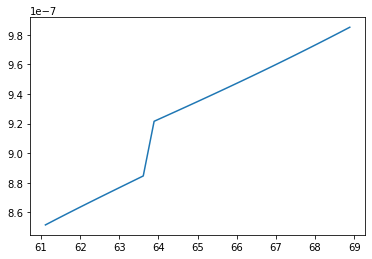

1.7060902875606642e-08


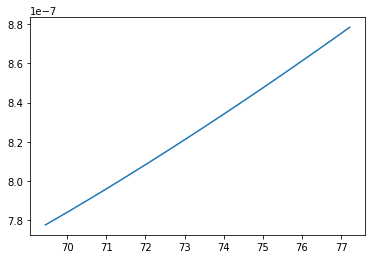

1.2983861695454073e-08


In [172]:
p0 = 0
for p1 in pks:
    #plt.plot(data.time[p0:p1],data.diameter[p0:p1])
    #plt.show()
    dt = data.time[p1]-data.time[p0]
    dy = data.diameter[p1]-data.diameter[p0]
    dydt = dy/dt
    #print(dydt)
    p0=p1+1

In [216]:
divs = pd.DataFrame(columns=['id','division','rate'])
cells = df.id.unique()
#cells.sort()
for cell in cells:
    data = df[df.id==cell].reset_index()
    if data.type.unique()[0] == 2:
        pks,_ = find_peaks(data.diameter)
        p0 = 0
        for i,p1 in enumerate(pks):
            #plt.plot(data.time[p0:p1],data.diameter[p0:p1])
            #plt.show()
            dt = data.time[p1]-data.time[p0]
            dy = data.diameter[p1]-data.diameter[p0]
            dydt = dy/dt
            divs = divs.append(pd.DataFrame([[cell,i+1,dydt*24e6]],columns=['id','division','rate']),ignore_index=True)
            #print(dydt)
            p0=p1+1
#plot cell id vs division rate over time
piv = divs.pivot_table(index='id', columns='division', values='rate')
g = sns.heatmap(piv, cmap='coolwarm',vmin=0)
cbar = g.collections[0].colorbar
cbar.ax.set_ylabel(r'Elongation rate ($\frac{\mu m}{hr}$)')

Text(379.57700000000006, 0.5, 'Elongation rate ($\\frac{\\mu m}{hr}$)')

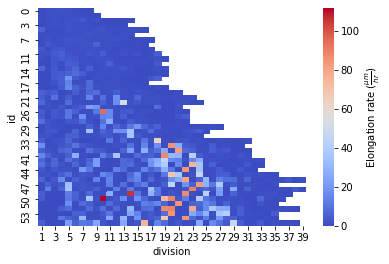

In [211]:
#todo compare cyano vs e. coli growth rates
#todo convert rate units to microns/hr or day
#todo replot with growth rate distributed across all timepoints
#todo check local nutrient concentration of highly fit cells
#todo make animations with bounds around fit cells and compare with unfit cells


2